In [1]:
# import libraries in alphabetical order

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3

In [2]:
# fetch data source

path_to_file = "https://raw.githubusercontent.com/tcraycroft01/python311Requests/master/Citizen311Data_July_2018.csv"
data = pd.read_csv(path_to_file)

In [3]:
# creates SQLite DB & establishes connection

cn1 = sqlite3.connect("citizen311.db")

# auto create table incidents_by_agency

data.to_sql("incidents_by_agency", cn1, schema=None, if_exists='replace', index=True, 
           index_label=None, chunksize=None, dtype=None)

# outputs table data to confirm setup a total of 12386 rows & 12 columns

data

,service_request_id,requested_datetime,updated_datetime,source,service_name,description,agency_responsible,address,council_district,status_description,lat,long
0,5088907,7/1/2018 1:38,NaN,UNKNOWN,ALLEY POTHOLE,"ALLEY POTHOLE, POTHL",LPM,"4305 W BROADWAY , LOUISVILLE, KY, 40211",5.0,OPEN,38.250791,-85.824421
1,5088879,7/1/2018 1:40,NaN,UNKNOWN,STREET TREE,"STREET EASEMENT TREES, OBSTRUCTION, ROWOB",LPM,"4305 W BROADWAY , LOUISVILLE, KY, 40211",5.0,OPEN,38.250791,-85.824421
2,5088846,7/1/2018 6:28,NaN,UNKNOWN,HIGH GRASS WEEDS,"HIGH GRASS, WEEDS, TREES, PRIVATE PROPERTY",IPL-PROPERTY MAINTENANCE DIV.,"7310 MARIA AVE , LOUISVILLE, KY, 40222",7.0,CLOSED,38.281501,-85.619034
3,5080683,7/1/2018 7:33,NaN,UNKNOWN,TRASH PVT PROP,"TRASH PRIVATE PROPERTY, TRASH, GARBAGE, JUNK",IPL-PROPERTY MAINTENANCE DIV.,"921 DENMARK ST , LOUISVILLE, KY, 40215",15.0,CLOSED,38.195922,-85.775900
4,5080684,7/1/2018 7:38,NaN,UNKNOWN,TRASH PVT PROP,"TRASH PRIVATE PROPERTY, TRASH, GARBAGE, JUNK",IPL-PROPERTY MAINTENANCE DIV.,"921 W EVELYN AVE , LOUISVILLE, KY, 40215",15.0,CLOSED,38.196846,-85.776010
5,5080685,7/1/2018 7:51,NaN,UNKNOWN,DAMAGE GARB CART,"DAMAGED GARBAGE CART, CARTD, SWMS",SWMS - ADMINISTRATION,"263 SAUNDERS AVE , LOUISVILLE, KY, 40206",9.0,OPEN,38.249611,-85.703551
6,5080686,7/1/2018 8:16,NaN,UNKNOWN,EXTERIOR VIOL,"EXTERIOR STRUCTURE VIOLATION, EXTVI",IPL-PROPERTY MAINTENANCE DIV.,"3601 TEMPLEWOOD DR , LOUISVILLE, KY, 40219",2.0,CLOSED,38.163635,-85.695049
7,5080687,7/1/2018 8:29,NaN,UNKNOWN,EXTERIOR VIOL,"EXTERIOR STRUCTURE VIOLATION, EXTVI",IPL-PROPERTY MAINTENANCE DIV.,"3601 FRIAR TUCK CT , LOUISVILLE, KY, 40219",2.0,CLOSED,38.165373,-85.696419
8,5088890,7/1/2018 9:35,NaN,UNKNOWN,SIGN OBSTRUCTION,"SIGN OBSTRUCTION, TREES, BRANCHES, ETC. ROWOB",LPM,"2101 LAUDERDALE RD , LOUISVILLE, KY, 40205",8.0,CLOSED,38.228411,-85.695216
9,5088891,7/1/2018 9:40,NaN,UNKNOWN,LIGHTING REPAIR,"LIGHTING REPAIR, STREET LIGHT, STLGT",PUBLIC WORKS ADMINISTRATION,"988 GOSS AVE , LOUISVILLE, KY, 40217",10.0,CLOSED,38.228012,-85.737068


In [4]:
#initial data cleanup using SQLite, removing columns: service_request id, requested_datetime, updated_datetime (which was empty/NaN),
#source, description, address, lat, long

cn1 = sqlite3.connect("citizen311.db")
c = cn1.cursor()

sql_incidents = '''
SELECT 
service_name as Incident,
agency_responsible as Agency,
council_district as CityCouncilDistrict,
status_description as Status
FROM incidents_by_agency
'''

# create a variable for sql_incidents query
incidents = pd.read_sql_query(sql_incidents, cn1)


cn1.commit()
cn1.close()

# outputs query data to confirm cleanup / selection

incidents

,Incident,Agency,CityCouncilDistrict,Status
0,ALLEY POTHOLE,LPM,5.0,OPEN
1,STREET TREE,LPM,5.0,OPEN
2,HIGH GRASS WEEDS,IPL-PROPERTY MAINTENANCE DIV.,7.0,CLOSED
3,TRASH PVT PROP,IPL-PROPERTY MAINTENANCE DIV.,15.0,CLOSED
4,TRASH PVT PROP,IPL-PROPERTY MAINTENANCE DIV.,15.0,CLOSED
5,DAMAGE GARB CART,SWMS - ADMINISTRATION,9.0,OPEN
6,EXTERIOR VIOL,IPL-PROPERTY MAINTENANCE DIV.,2.0,CLOSED
7,EXTERIOR VIOL,IPL-PROPERTY MAINTENANCE DIV.,2.0,CLOSED
8,SIGN OBSTRUCTION,LPM,8.0,CLOSED
9,LIGHTING REPAIR,PUBLIC WORKS ADMINISTRATION,10.0,CLOSED


In [5]:
# further data cleanup using SQLite to remove incidents with results with fewer than 100 calls 
# and narrowing it down to the TOP 5 Number of Calls & Type of Incident

cn1 = sqlite3.connect("citizen311.db")
c = cn1.cursor()

sql_count_incident = '''
SELECT 
service_name as Incident, COUNT(*) AS Count
FROM incidents_by_agency
GROUP BY service_name
HAVING COUNT(*) > 100
ORDER BY COUNT(*) DESC
LIMIT 5
'''

# create a variable for sql_incidents query
count = pd.read_sql_query(sql_count_incident, cn1)


cn1.commit()
cn1.close()

# outputs query data to confirm results

count

,Incident,Count
0,HIGH GRASS WEEDS,1078
1,DAMAGE GARB CART,629
2,EXTERIOR VIOL,597
3,TRASH PVT PROP,542
4,GARBAGE MISSED,541


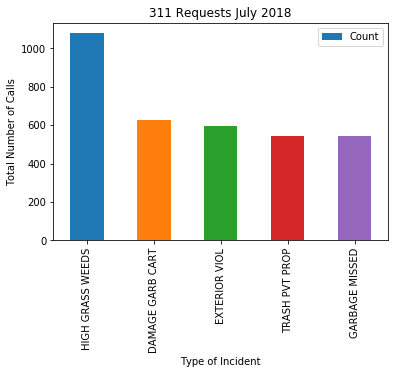

In [20]:
# Plot Bar Graph displaying results

ax = count.plot.bar(x = 'Incident', y = 'Count', )
ax.set_xlabel('Type of Incident')
ax.set_ylabel('Total Number of Calls')
ax.set_title('311 Requests July 2018')
plt.show()

My results show that High Grass Weeds had the most incidents reported for a 1-month period (July 2018), almost double as many of the other 4 incidents that complete the top 5.